# Load and Process Dataset

In [ ]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# Load Data
data = pd.read_csv('heart.csv')
data.shape

# Two samples
#data.head(2)

# Seprate features and labels
X = np.array(data.loc[:, data.columns != 'output'])
Y = np.array(data['output'])

print('Shape for X', X.shape)
print('Shape for Y', Y.shape)

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=123)


# Standardize Dependent features of data
Scaler = StandardScaler()
Normalized_X_train = Scaler.fit_transform(X_train)
Normalized_X_test = Scaler.transform(X_test)


print('Shape for Normalized training data dependent variables', Normalized_X_train.shape)
print('Shape for Normalized testing data dependent variables', Normalized_X_test.shape)

Shape for X (303, 13)
Shape for Y (303,)
Shape for Normalized training data dependent variables (242, 13)
Shape for Normalized testing data dependent variables (61, 13)


# Load Model instance and Training

In [6]:
from model import HeartAttackPredictor

# Hyper parameters
LR = 0.1
ITERATIONS = 1000

# model instance and training
HAB = HeartAttackPredictor(learning_rate=LR, x_train=Normalized_X_train, y_train=Y_train, x_test=Normalized_X_test, y_test=Y_test)
HAB.train(iterations=ITERATIONS)

'Training complete'

# Evaluation

<Axes: >

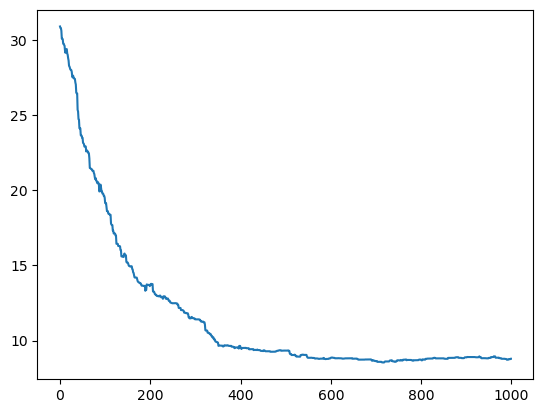

In [7]:
# Training loss
#sns.lineplot(x=list(range(len(HAB.train_loss))), y=HAB.train_loss)

# Test loss
sns.lineplot(x=list(range(len(HAB.test_loss))), y=HAB.test_loss)

In [ ]:
# calculate accuracy
total = Normalized_X_test.shape[0]
correct = 0
y_preds = []
for i in range(total):
    y_true = Y_test[i]
    y_pred = np.round(HAB.forward_pass(Normalized_X_test[i]))
    y_preds.append(y_pred)
    correct += 1 if y_true == y_pred else 0

acc = correct / total
print(acc)


0.8032786885245902


In [11]:
# %% Baseline Classifier
from collections import Counter
Counter(Y_test)
# %% Confusion Matrix
confusion_matrix(y_true = Y_test, y_pred = y_preds)


array([[26,  4],
       [ 8, 23]])